In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 9.5MB 31.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('state_wise_daily.csv',index_col='Date_YMD')
data.drop(["Date"],inplace=True,axis=1)
data.head()
confirmed=data[data['Status']=='Confirmed']
recovered=data[data["Status"]=='Recovered']
deceased=data[data["Status"]=='Deceased']

In [2]:
confirmed.drop(["Status"],inplace=True,axis=1)
recovered.drop(["Status"],inplace=True,axis=1)
deceased.drop(["Status"],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## List of state abbrevations  TT	AN	AP	AR	AS	BR	CH	CT	DN	DD	DL	GA	GJ	HR	HP	JK	JH	KA	KL	LA	LD	MP	MH	MN	ML	MZ	NL	OR	PY	PB	RJ	SK	TN	TG	TR	UP	UT	WB	UN

In [3]:
target_state=input()
data=pd.DataFrame(confirmed[target_state])
data["recovered"]=(recovered[target_state])
data["deceased"]=(deceased[target_state])
data.columns=["confirmed","recovered","deceased"]

GJ


In [4]:
data

,confirmed,recovered,deceased
Date_YMD,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,0,0,0
2020-03-18,0,0,0
...,...,...,...
2021-06-30,90,304,3
2021-07-01,84,300,3
2021-07-02,80,228,2


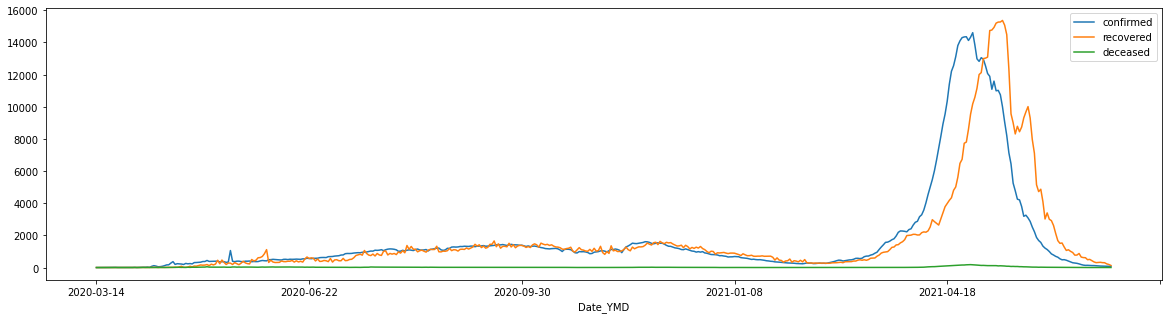

In [5]:
data.plot(figsize=(20,5),legend=True)

In [6]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['confirmed'])

1. ADF :  -3.5317702825091275
2. P-Value :  0.007207684638986584
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 467
5. Critical Values :
	 1% :  -3.4444305322234365
	 5% :  -2.8677488864580885
	 10% :  -2.5700770984781443


In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(data['confirmed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6051.331, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6420.646, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6150.801, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6282.856, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6418.646, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6050.825, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6197.739, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6051.831, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6051.101, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6175.332, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6051.179, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6047.319, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6041.749, Time=1.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6046.840, Time=1.02 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [9]:
train=data.iloc[:-15]
test=data.iloc[-15:]
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['confirmed'],order=(3,1,3))
model=model.fit()

2021-04-18    10081.025615
2021-04-19    10900.545452
2021-04-20    12066.709396
2021-04-21    12865.747908
2021-04-22    13060.938958
                  ...     
2021-06-30      124.892387
2021-07-01      124.772176
2021-07-02      118.259408
2021-07-03      115.554617
2021-07-04      111.692976
Freq: D, Length: 78, dtype: float64


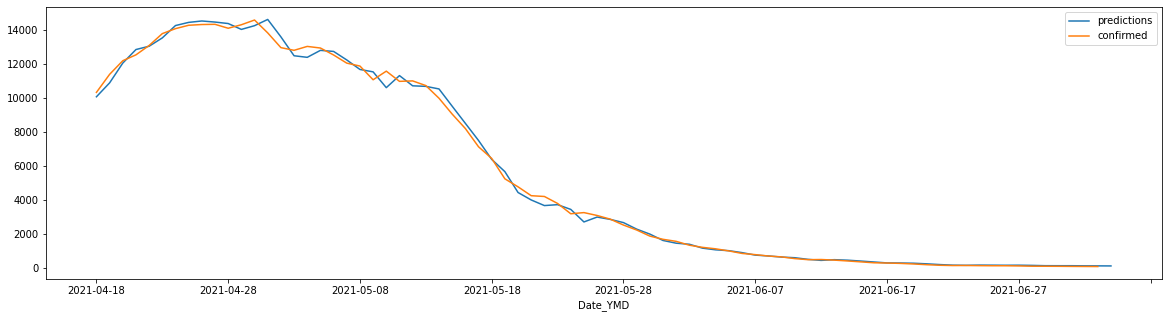

In [10]:
start=400
#end=len(train)+len(test)-1
end=len(data)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=data.index[start:end+1]
pred=pd.DataFrame(pred)
pred.columns=["predictions"]
pred.plot(figsize=(20,5),legend=True)
data['confirmed'][start:end].plot(legend=True)

In [25]:
indexfuture=pd.date_range(start="2021-07-03",end="2021-08-31")
pred2=model.predict(start=len(data),end=len(data)+59,typ='levels').rename("Arima predictions")
pred2.index=indexfuture

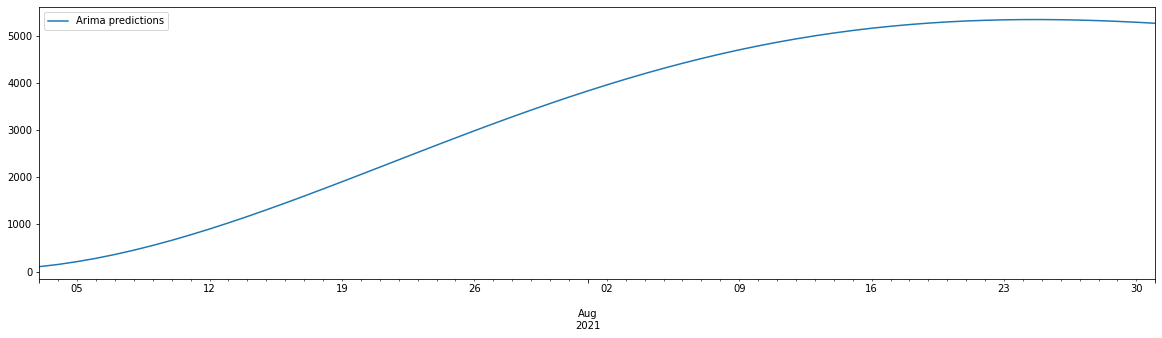

In [26]:
pred2.plot(legend=True,figsize=(20,5))

## Example 2

In [75]:
target_state=input()
data=pd.DataFrame(confirmed[target_state])
data["recovered"]=(recovered[target_state])
data["deceased"]=(deceased[target_state])
data.columns=["confirmed","recovered","deceased"]

TG


In [76]:
data

,confirmed,recovered,deceased
Date_YMD,,,
2020-03-14,1,0,0
2020-03-15,2,1,0
2020-03-16,1,0,0
2020-03-17,1,0,0
2020-03-18,8,0,0
...,...,...,...
2021-06-30,917,1006,10
2021-07-01,869,1197,8
2021-07-02,858,1175,9


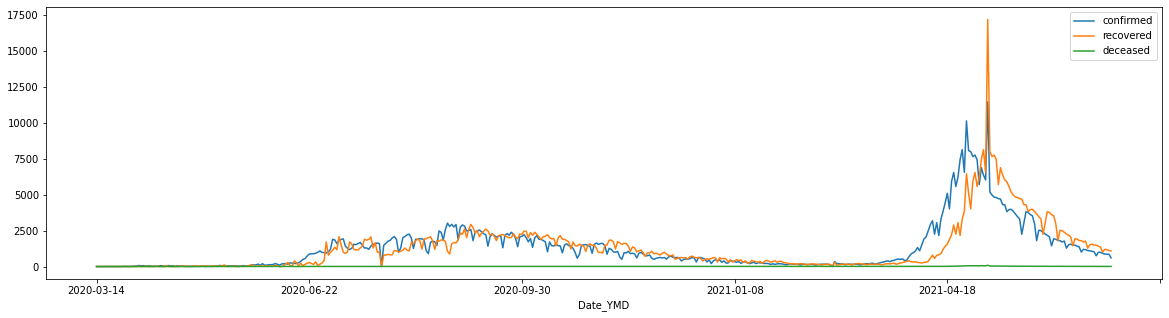

In [77]:
data.plot(figsize=(20,5),legend=True)

In [78]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['confirmed'])

1. ADF :  -3.2427296617634354
2. P-Value :  0.017640773911795013
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 463
5. Critical Values :
	 1% :  -3.44455286264131
	 5% :  -2.8678027030003483
	 10% :  -2.5701057817594894


In [79]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [80]:
stepwise_fit = auto_arima(data['confirmed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7240.154, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7359.966, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7263.781, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7241.769, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7357.970, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7225.168, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7240.972, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7241.496, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7241.781, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7239.846, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7223.171, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7238.973, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7

In [81]:
train=data.iloc[:-15]
test=data.iloc[-15:]
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['confirmed'],order=(2,1,2))
model=model.fit()

2021-04-18    4021.379108
2021-04-19    4514.117629
2021-04-20    4420.121677
2021-04-21    5121.578121
2021-04-22    5740.817695
                 ...     
2021-06-30     939.358163
2021-07-01     964.496207
2021-07-02     902.942736
2021-07-03     885.717939
2021-07-04     858.818925
Freq: D, Length: 78, dtype: float64


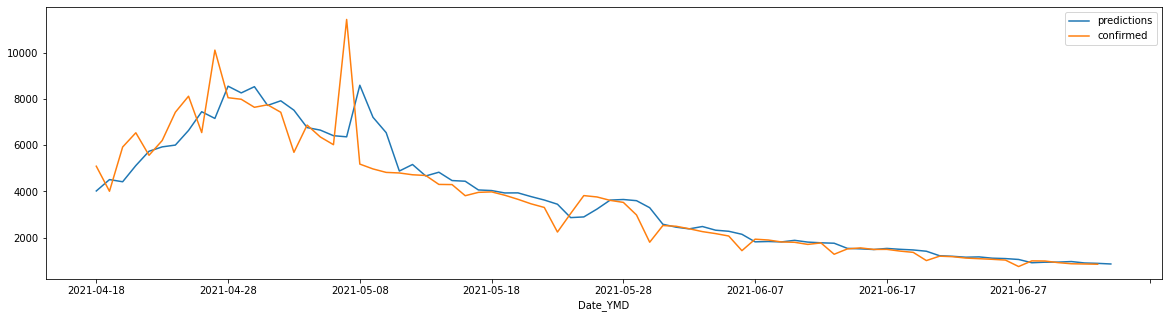

In [82]:
start=400
#end=len(train)+len(test)-1
end=len(data)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=data.index[start:end+1]
pred=pd.DataFrame(pred)
pred.columns=["predictions"]
pred.plot(figsize=(20,5),legend=True)
data['confirmed'][start:end].plot(legend=True)

In [85]:
indexfuture=pd.date_range(start="2021-07-03",end="2021-08-1")
pred2=model.predict(start=len(data),end=len(data)+29,typ='levels').rename("Arima predictions")
pred2.index=indexfuture

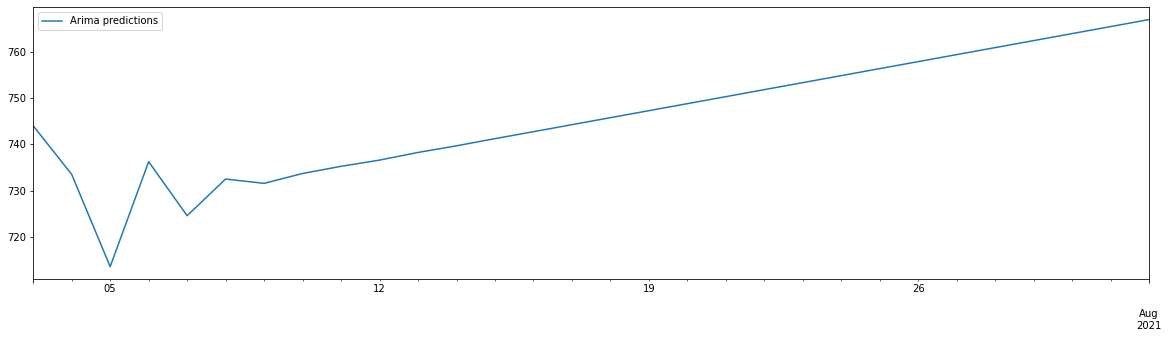

In [86]:
pred2.plot(legend=True,figsize=(20,5))